In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
import time
import random
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate

# fft2()



```
To summarize, the fft2() function calculates the FFT along axis=0 and axis=1
 separately, and the resulting spectra are combined to form a two-dimensional
  complex-valued spectrum that captures the frequency content in
  both the horizontal and vertical directions of the input image.
```



[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


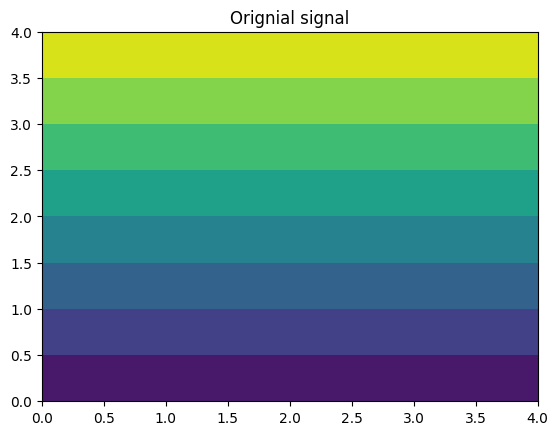

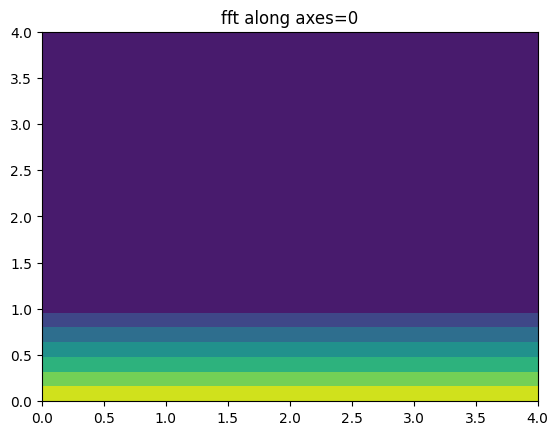

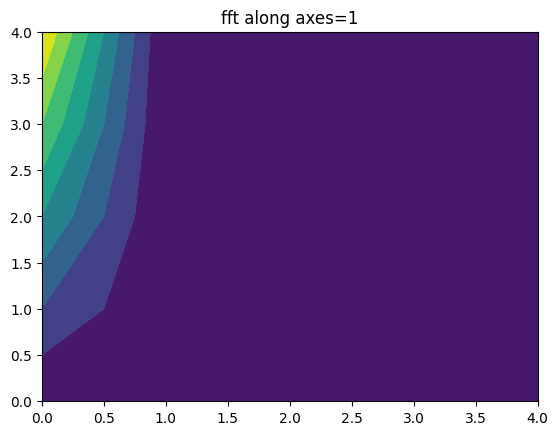

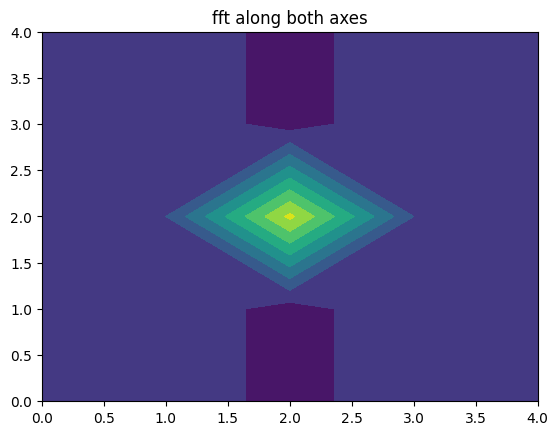

In [14]:
import scipy.fft
import numpy as np
x = np.mgrid[:5, :5][0]
print(x)
plt.contourf(x)
plt.title('Orignial signal')
plt.show()

#fft along axes=0
xX0=scipy.fft.fft2(x,axes=0)

#fft along axes=1
xX1 = scipy.fft.fft2(x,axes=1)


#fft along both axes
#xX = scipy.fft.fftshift(scipy.fft.fft2(x))
xX = scipy.fft.fftshift(scipy.fft.fft2(xX0,axes=1))#fft on axes=0  and fft of obtained result on axes=1


#plot
plt.contourf(np.real(xX0))
plt.title('fft along axes=0')#fft of each column
plt.show()

plt.contourf(np.real(xX1))
plt.title('fft along axes=1')#fft of each row
plt.show()

plt.contourf(np.real(xX))
plt.title('fft along both axes')
plt.show()


---
# VIDEO: How the 2D FFT works
---


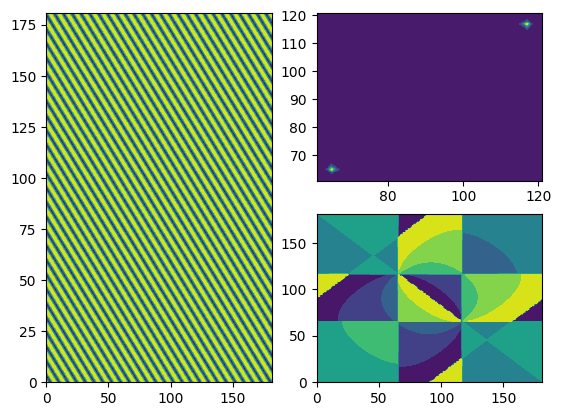

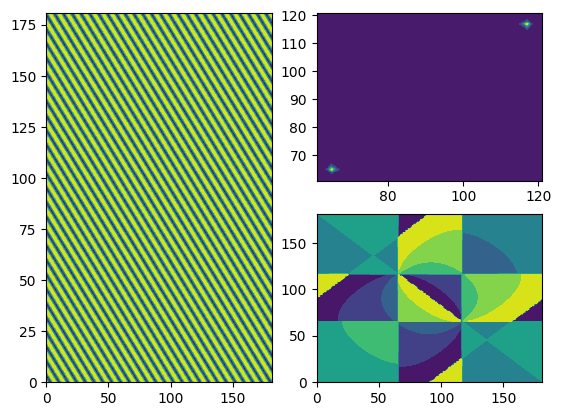

In [ ]:
## movie to illustrate frequencies

# specify vector of sine frequencies
sinefreq = np.linspace(.0001,.2,50) # arbitrary units #Frequency is increasing


# leave this fixed for now
sinephas = np.pi/4 #you can vary and see the results


# sine wave initializations
lims  = [-91,91]
[x,y] = np.meshgrid(range(lims[0],lims[1]),range(lims[0],lims[1]))
xp    = x*np.cos(sinephas) + y*np.sin(sinephas)


for si in range(0,len(sinefreq)):

    # compute sine wave
    img = np.sin( 2*np.pi*sinefreq[si]*xp )

    # 2D FFT and extract power and phase spectra
    imgX  = scipy.fftpack.fftshift(scipy.fftpack.fft2(img))

    powr2 = np.abs(imgX)
    phas2 = np.angle(imgX)


    # show original image
    pl.cla() # wipe the figure
    plt.subplot2grid((1,2),(0,0))
    plt.contourf(img)

    # show amplitude spectrum
    plt.subplot2grid((2,2),(0,1))
    plt.contourf(powr2)
    plt.xlim([61,121])
    plt.ylim([61,121])

    # show phase spectrum
    plt.subplot2grid((2,2),(1,1))
    plt.contourf(phas2)

    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(.01)




```
2D Sine wave
case1: Frequency is increased slowly. and phase is constant.
```



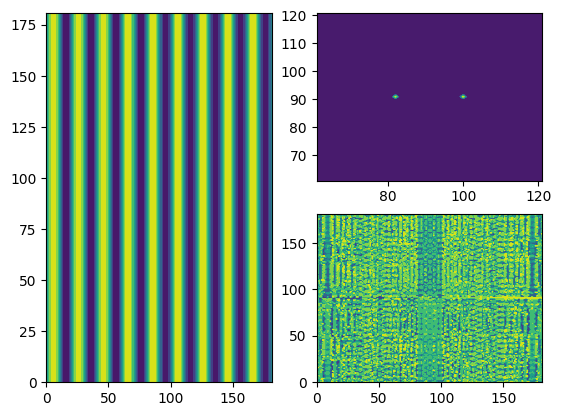

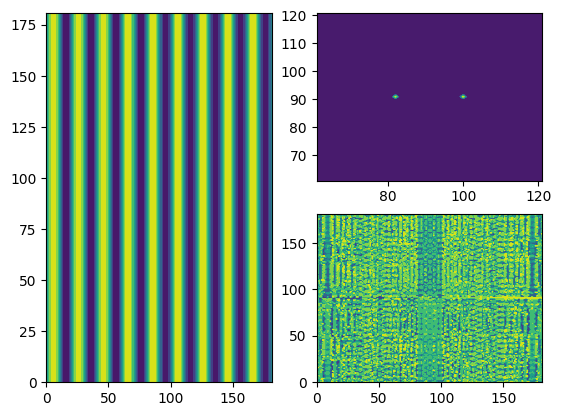

In [ ]:
## movie to illustrate phases

# specify vector of sine gradient phases
sinephas = np.linspace(0,np.pi,50) # arbitrary units

# leave this fixed for now
sinefreq = .05


# sine wave initializations
lims  = [-91,91]
[x,y] = np.meshgrid(range(lims[0],lims[1]),range(lims[0],lims[1]))


for si in range(0,len(sinephas)):

    # compute sine wave
    xp  = x*np.cos(sinephas[si]) + y*np.sin(sinephas[si])
    img = np.sin( 2*np.pi*sinefreq*xp )

    # 2D FFT and extract power and phase spectra
    imgX  = scipy.fftpack.fftshift(scipy.fftpack.fft2(img))

    powr2 = np.abs(imgX)
    phas2 = np.angle(imgX)


    # show original image
    pl.cla() # wipe the figure
    plt.subplot2grid((1,2),(0,0))
    plt.contourf(img)

    # show amplitude spectrum
    plt.subplot2grid((2,2),(0,1))
    plt.contourf(powr2)
    plt.xlim([61,121])
    plt.ylim([61,121])

    # show phase spectrum
    plt.subplot2grid((2,2),(1,1))
    plt.contourf(phas2)

    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(.01)


In [ ]:
xp  = x*np.cos(sinephas[si]) + y*np.sin(sinephas[si])
xp.shape

(182, 182)

In [ ]:
print(img)
print(img.shape)

[[-3.09016994e-01  4.65489580e-15  3.09016994e-01 ... -5.87785252e-01
  -3.09016994e-01  2.45053156e-15]
 [-3.09016994e-01  4.65489580e-15  3.09016994e-01 ... -5.87785252e-01
  -3.09016994e-01  2.45053156e-15]
 [-3.09016994e-01  4.65489580e-15  3.09016994e-01 ... -5.87785252e-01
  -3.09016994e-01  2.45053156e-15]
 ...
 [-3.09016994e-01 -2.45053156e-15  3.09016994e-01 ... -5.87785252e-01
  -3.09016994e-01 -4.65489580e-15]
 [-3.09016994e-01 -2.45053156e-15  3.09016994e-01 ... -5.87785252e-01
  -3.09016994e-01 -4.65489580e-15]
 [-3.09016994e-01 -2.45053156e-15  3.09016994e-01 ... -5.87785252e-01
  -3.09016994e-01 -4.65489580e-15]]
(182, 182)




```
case2: Freq is constant. phase is varied
```



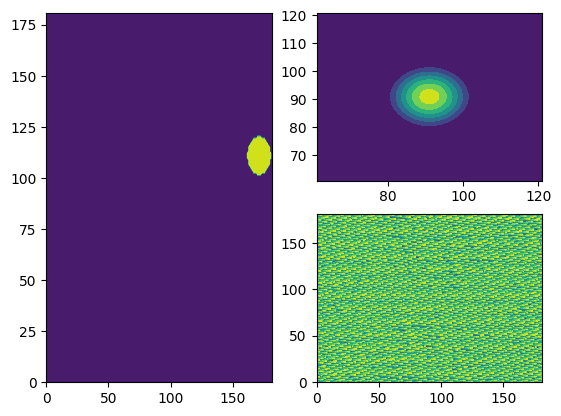

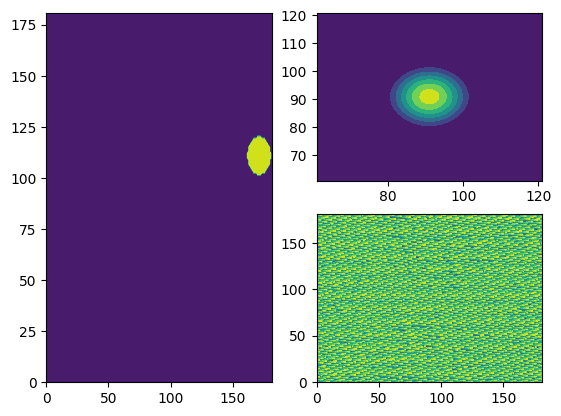

In [ ]:
## physical location

width = 20 # width of Gaussian
centlocs = np.linspace(-80,80,50)

for si in range(0,len(centlocs)):

    # create Gaussian
    mx = x-centlocs[si]
    my = y-20

    gaus2d = np.exp( -( mx**2 + my**2 ) / (2*width**2) )
    img = np.zeros((len(gaus2d),len(gaus2d)))
    img[gaus2d>.9] = 1

    # 2D FFT and extract power and phase spectra
    imgX  = scipy.fftpack.fftshift(scipy.fftpack.fft2(img))

    powr2 = np.abs(imgX)
    phas2 = np.angle(imgX)


    # show original image
    pl.cla() # wipe the figure
    plt.subplot2grid((1,2),(0,0))
    plt.contourf(img)

    # show amplitude spectrum
    plt.subplot2grid((2,2),(0,1))
    plt.contourf(powr2)
    plt.xlim([61,121])
    plt.ylim([61,121])

    # show phase spectrum
    plt.subplot2grid((2,2),(1,1))
    plt.contourf(phas2)

    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(.01)






```
Amplitude is same and phase is varied.
```

